# PREMIER LEAGUE 2020-2021 
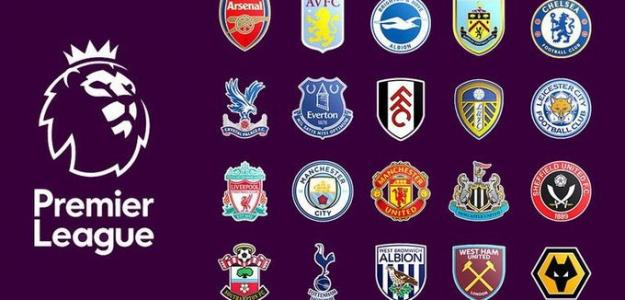

#Introduccion a la liga
La Premier League, también conocida en Inglaterra como The Premiership, es la máxima categoría del sistema de ligas de fútbol de Inglaterra.
La Premier League es considerada una de las cinco grandes ligas europeas junto con la Primera División española, la Serie A italiana, la Bundesliga alemana y la Ligue 1 francesa,  ocupando el primer puesto del coeficiente UEFA. Según la Federación Internacional de Historia y Estadística de Fútbol (IFFHS), es la «liga más relevante del mundo». El torneo fue considerado por la IFFHS de la FIFA como la liga más fuerte de la primera década del siglo XXI en Europa, superando a la Primera División de España y la Serie A de Italia que ocupaban el segundo y tercer lugar respectivamente 

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.formula.api as sm
from   scipy import stats
drive.mount('/content/drive')

Mounted at /content/drive


#ABSTRACT
  El siguiente trabajo se presenta a partir del estudio y análisis de los datos acumulados en la liga de fútbol inglesa para la temporada 2021-2022, poniendo a disposición del observador los principales aspectos estadísticos que explican el rendimiento de cada equipo y la comparativa entre los participantes que permitan detectar las fortalezas y los aspectos a mejorar. 
  Es desde esta mirada que se realiza el estudio de la información del set de datos, reconociendo y organizando primeramente el contenido (nombres de columnas y que abarcan) para luego ir respondiendo los principales cuestionamientos en cuanto a datos de tipo biométricos, del estilo de juego en la liga y de los rendimientos por posición en el campo de juego. 
  Desde este punto, surgen paralelamente las hipótesis sobre la efectividad del estilo de juego de cada equipo (ofensivo/defensivo), de los rendimientos de cada jugador en base a los goles y asistencias realizados, los promedios estadísticos y cuanto generan los jugadores en base a los minutos jugados.
  Para materializar las conclusiones se realizarán las consultas que permitan visualizar el análisis de los datos, utilizando de esta manera gráficos de barras, histogramas, boxplots, etc.; seguido de la hipótesis planteada y una descripción de lo que puede apreciarse en el gráfico. 
  De esta manera se buscará a continuación la organización adecuada de la información junto a un planteo con orden lógico de las hipótesis, desarrollo y conclusiones finales a cada situación; motivando a una audiencia orientada al deporte, apuestas deportivas o de manera general la posibilidad de responder inquietudes y curiosidades a traves de la visualizacion de los datos procesados de manera racional y simple.


##Hipótesis
  Verificar si un gran porcentaje (70%) de los jugadores solo se destacan en un apartado específico según la posición en que se desempeñan (por ejemplo el atacante solo se destaca en goles y el defensor en balones recuperados) o cada jugador puede destacarse en varios aspectos sin tener de referencia la posición en la que juegan. A su vez identificar patrones relacionados a la edad, minutos jugados y país en el cual nacieron. Por último tener conocimiento de los rendimientos destacados en el equipo en el cual participaron los jugadores en la temporada analizada.
  Por último también se tendrán en cuenta la cercanía en las relaciones entre variables que se puedan dar a partir de la aplicacion de las diferentes técnicas y métodos. 


In [ ]:
%cd '/content/drive/MyDrive/datasets/'
Football= pd.read_csv('Football Players Stats (Premier League 2021-2022).csv',sep=',',encoding='latin-1')
Football

/content/drive/MyDrive/datasets


,Player,Team,Nation,Pos,Age,MP,Starts,Min,90s,Gls,...,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1
0,Bukayo Saka,Arsenal,eng ENG,"FW,MF",19.0,38,36,"2,978",33.1,11.0,...,0.48,9.7,8.2,6.9,15.2,0.29,0.21,0.50,0.25,0.46
1,Gabriel Dos Santos,Arsenal,br BRA,DF,23.0,35,35,"3,063",34.0,5.0,...,0.15,2.7,2.7,0.8,3.5,0.08,0.02,0.10,0.08,0.10
2,Aaron Ramsdale,Arsenal,eng ENG,GK,23.0,34,34,"3,060",34.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
3,Ben White,Arsenal,eng ENG,DF,23.0,32,32,"2,880",32.0,0.0,...,0.00,1.0,1.0,0.6,1.6,0.03,0.02,0.05,0.03,0.05
4,Martin Ødegaard,Arsenal,no NOR,MF,22.0,36,32,"2,785",30.9,7.0,...,0.36,4.8,4.8,6.8,11.6,0.16,0.22,0.38,0.16,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,Christian Marques,Wolverhampton Wanderers,ch SUI,DF,18.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687,Yerson Mosquera,Wolverhampton Wanderers,co COL,DF,20.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
688,Louie Moulden,Wolverhampton Wanderers,eng ENG,GK,19.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
689,Dion Sanderson,Wolverhampton Wanderers,eng ENG,DF,21.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Nombres de las columnas

Player : Player's name

Team : Played club in 2021-2020

Nation : Player's nation


Pos : Position


Age : Player's age


MP : Matches played


Starts : Matches started


Min : Minutes played


90s : Minutes played divided by 90


Gls : Goals scored or allowed


Ast : Assists


G-PK : Non Penalty Goals


PK : Penalty Kicks made


PKatt : Penalty Kicks attended


CrdY : Yellow Cards


CrdR : Red Cards


Gls : Goals scored per 90 mins


Ast : Assits per 90 mins


G+A : Goals and Assists per 90 mins


G-PK : Goals minus Penalty Kicks made per 90 mins


G+A-PK: Goals plus Assists minus Penalty Kicks made per 90 mins


xG : Expected Golas


npxG : Non-Penalty Expected Goals


xA : Expected Assits


npxG+xA : Non-Penalty Expected Goals plus Expected Assists


xG : Expected Golas per 90 mins


npxG : Non-Penalty Expected Goals made per 90 mins


xA : Expected Assits made per 90 mins


npxG+xA : Non-Penalty Expected Goals plus Expected Assists made per 90 mins

#Objetivo 
Como primer objetivo buscamos alguna relación de los equipos con respecto a los goles realizado durante la temporada, ya sea por temas del equipo, posición del jugador o incluso la edad.

# Cambios en el dataset 
Se eliminaron datos nulos ya que no se requerian para el análisis o mostraban algún cambion a la hora de graficar.

In [ ]:
#Dataset con nulos eliminiados
Football_prueba = Football.dropna()
Football_prueba

,Player,Team,Nation,Pos,Age,MP,Starts,Min,90s,Gls,...,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1
0,Bukayo Saka,Arsenal,eng ENG,"FW,MF",19.0,38,36,"2,978",33.1,11.0,...,0.48,9.7,8.2,6.9,15.2,0.29,0.21,0.50,0.25,0.46
1,Gabriel Dos Santos,Arsenal,br BRA,DF,23.0,35,35,"3,063",34.0,5.0,...,0.15,2.7,2.7,0.8,3.5,0.08,0.02,0.10,0.08,0.10
2,Aaron Ramsdale,Arsenal,eng ENG,GK,23.0,34,34,"3,060",34.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
3,Ben White,Arsenal,eng ENG,DF,23.0,32,32,"2,880",32.0,0.0,...,0.00,1.0,1.0,0.6,1.6,0.03,0.02,0.05,0.03,0.05
4,Martin Ødegaard,Arsenal,no NOR,MF,22.0,36,32,"2,785",30.9,7.0,...,0.36,4.8,4.8,6.8,11.6,0.16,0.22,0.38,0.16,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,Luke Cundle,Wolverhampton Wanderers,eng ENG,MF,19.0,4,2,180,2.0,0.0,...,0.00,0.0,0.0,0.2,0.2,0.00,0.12,0.12,0.00,0.12
679,Chiquinho,Wolverhampton Wanderers,pt POR,"DF,MF",21.0,8,1,208,2.3,0.0,...,1.30,0.3,0.3,0.6,0.9,0.13,0.27,0.41,0.13,0.41
680,John Ruddy,Wolverhampton Wanderers,eng ENG,GK,34.0,2,1,135,1.5,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
681,Chem Campbell,Wolverhampton Wanderers,wls WAL,MF,18.0,1,0,13,0.1,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00


#Exploratorio de datos
En este apartado se mostrarán los datos de manera generalizada para tener un primer punto de vista de los datos a procesar

In [ ]:
Football_prueba.shape

(546, 30)

In [ ]:
# Número de jugadores que hay en los equipos
pd.DataFrame(Football.groupby(['Team'])['Player'].count())

,Player
Team,
Arsenal,41
Aston Villa,41
Brentford,36
Brighton & Hove Albion,35
Burnley,32
Chelsea,31
Crystal Palace,30
Everton,40
Leeds United,33


In [ ]:
# Dataframe del promedio de edad por equipo
Equipo=pd.DataFrame(Football.groupby(['Team'])['Age'].mean())
Equipo

,Age
Team,
Arsenal,22.487805
Aston Villa,23.658537
Brentford,23.527778
Brighton & Hove Albion,23.685714
Burnley,27.032258
Chelsea,25.387097
Crystal Palace,25.400000
Everton,24.550000
Leeds United,22.750000


In [ ]:
#Información del dataset 
Football.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Player     691 non-null    object 
 1   Team       691 non-null    object 
 2   Nation     688 non-null    object 
 3   Pos        691 non-null    object 
 4   Age        687 non-null    float64
 5   MP         691 non-null    int64  
 6   Starts     691 non-null    int64  
 7   Min        546 non-null    object 
 8   90s        547 non-null    float64
 9   Gls        547 non-null    float64
 10  Ast        547 non-null    float64
 11  G-PK       547 non-null    float64
 12  PK         547 non-null    float64
 13  PKatt      547 non-null    float64
 14  CrdY       547 non-null    float64
 15  CrdR       547 non-null    float64
 16  Gls.1      546 non-null    float64
 17  Ast.1      546 non-null    float64
 18  G+A        546 non-null    float64
 19  G-PK.1     546 non-null    float64
 20  G+A-PK    

In [ ]:
#Resumen estadístico
Football.describe()

,Age,MP,Starts,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,...,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1
count,687.000000,691.000000,691.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,...,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,24.490539,15.173661,12.098408,15.255941,1.895795,1.361974,1.742230,0.153565,0.188300,2.451554,...,0.203443,1.928755,1.784982,1.300916,3.088828,0.137216,0.092619,0.230037,0.130147,0.222967
std,4.900421,12.954948,12.057790,11.260210,3.255050,2.037348,2.934154,0.675447,0.786336,2.563289,...,0.535085,2.982733,2.673862,1.711252,4.055039,0.259142,0.295461,0.405768,0.254656,0.402157
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,0.000000,4.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.100000,0.100000,0.100000,0.300000,0.020000,0.010000,0.050000,0.012500,0.050000
50%,24.000000,14.000000,9.000000,14.700000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,...,0.100000,0.800000,0.750000,0.650000,1.600000,0.060000,0.060000,0.130000,0.060000,0.130000
75%,28.000000,28.000000,22.000000,23.900000,2.000000,2.000000,2.000000,0.000000,0.000000,4.000000,...,0.280000,2.500000,2.400000,1.900000,4.300000,0.170000,0.120000,0.330000,0.160000,0.310000
max,39.000000,38.000000,38.000000,38.000000,23.000000,13.000000,23.000000,6.000000,7.000000,11.000000,...,11.250000,21.800000,17.100000,11.200000,27.400000,4.480000,6.500000,6.500000,4.480000,6.500000


In [ ]:
#Número de jugadores por posición
Posicion=pd.DataFrame(Football.groupby(['Pos'])['Player'].count())
Posicion

,Player
Pos,
DF,233
"DF,FW",4
"DF,MF",9
FW,99
"FW,DF",2
"FW,MF",62
GK,74
MF,158
"MF,DF",11


In [ ]:
#Top 10 de nacionalidades dentro de la liga
nacionalidad=pd.DataFrame(Football.groupby(['Nation'])['Player'].count())
nacionalidad.sort_values('Player',ascending=False,inplace=True)
(nacionalidad.head(10))

,Player
Nation,
eng ENG,277
fr FRA,37
es ESP,34
br BRA,29
sct SCO,27
ie IRL,24
pt POR,22
nl NED,19
wls WAL,17


In [ ]:
#Tipo de columna 
Football.dtypes

Player        object
Team          object
Nation        object
Pos           object
Age          float64
MP             int64
Starts         int64
Min           object
90s          float64
Gls          float64
Ast          float64
G-PK         float64
PK           float64
PKatt        float64
CrdY         float64
CrdR         float64
Gls.1        float64
Ast.1        float64
G+A          float64
G-PK.1       float64
G+A-PK       float64
xG           float64
npxG         float64
xA           float64
npxG+xA      float64
xG.1         float64
xA.1         float64
xG+xA        float64
npxG.1       float64
npxG+xA.1    float64
dtype: object

# Graficos Descriptivos
Para primera impresión realizamos tres graficos para saber si hay alguna relación entre los factores que planteamos, entre ellos tenemos la posición, la edad y el equipo

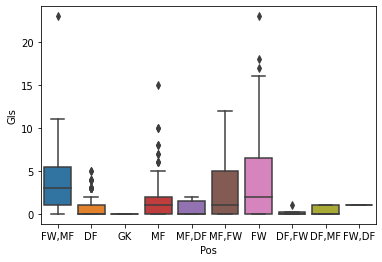

In [ ]:
sns.boxplot(x='Pos', y = 'Gls', data = Football_prueba) 

Se verifica una relacion logica entre las posiciones en el campo de juego y los goles convertidos, con casos especiales de centrocampistas puros con capacidad goleadora del mismo nivel al de los delanteros.

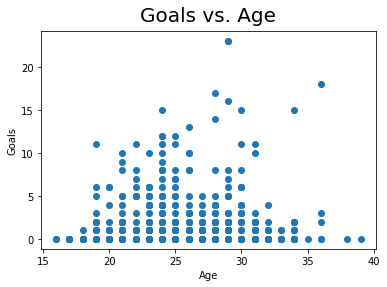

In [ ]:
plt.scatter(Football_prueba['Age'],Football_prueba['Gls'])
plt.title("Goals vs. Age", fontsize=20, verticalalignment='bottom');
plt.xlabel("Age");
plt.ylabel("Goals");

Se verifica una mayor concentracion de goles en la franja de 24 a 30 años debido a que hay mayor cantidad de jugadores dentro de la franja, y una segunda franja goleadora de jugadores de 19 a 23 años que tienen potencial a futuro en cunato a convertir goles. Luego de los 32 años baja consistentemente la capacidad goleadora de los jugadores.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

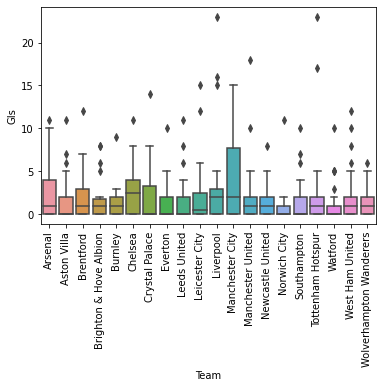

In [ ]:
sns.boxplot(x='Team', y = 'Gls', data = Football_prueba) 
plt.xticks(rotation=90)

A excepcion del Manchester City quien tiene una capacidad goleadora muy superior, además el caso contrario como lo son el Norwich city y el watfford son equipos que no convierten muchos goles a los largo de la temporada, en el resto de los equipos el nivel es parejo y con una normalidad en los outliers pertenencientes a los jugadores mas goleadores.

#Metodo de feature selection
Decidimos utilizar este metodo por simplicidad para el tratamiento de datos cuantitativos. 

Los demás metodos se aplicaron pero no fueron eficientes en los resultados 

La variable Y son los goles por lo que buscamos alghuna relación entre las demás

In [ ]:
X = Football_prueba.drop(['Gls', 'Player', 'Team', 'Nation', 'Pos','Min'], axis=1)       # feature matrix
y = Football_prueba['Gls']               # target feature
Football_prueba.head()

,Player,Team,Nation,Pos,Age,MP,Starts,Min,90s,Gls,...,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1
0,Bukayo Saka,Arsenal,eng ENG,"FW,MF",19.0,38,36,"2,978",33.1,11.0,...,0.48,9.7,8.2,6.9,15.2,0.29,0.21,0.50,0.25,0.46
1,Gabriel Dos Santos,Arsenal,br BRA,DF,23.0,35,35,"3,063",34.0,5.0,...,0.15,2.7,2.7,0.8,3.5,0.08,0.02,0.10,0.08,0.10
2,Aaron Ramsdale,Arsenal,eng ENG,GK,23.0,34,34,"3,060",34.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
3,Ben White,Arsenal,eng ENG,DF,23.0,32,32,"2,880",32.0,0.0,...,0.00,1.0,1.0,0.6,1.6,0.03,0.02,0.05,0.03,0.05
4,Martin Ødegaard,Arsenal,no NOR,MF,22.0,36,32,"2,785",30.9,7.0,...,0.36,4.8,4.8,6.8,11.6,0.16,0.22,0.38,0.16,0.38


In [ ]:
#Matriz X sin los goles 
X

,Age,MP,Starts,90s,Ast,G-PK,PK,PKatt,CrdY,CrdR,...,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1
0,19.0,38,36,33.1,7.0,9.0,2.0,2.0,6.0,0.0,...,0.48,9.7,8.2,6.9,15.2,0.29,0.21,0.50,0.25,0.46
1,23.0,35,35,34.0,0.0,5.0,0.0,0.0,8.0,1.0,...,0.15,2.7,2.7,0.8,3.5,0.08,0.02,0.10,0.08,0.10
2,23.0,34,34,34.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
3,23.0,32,32,32.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.00,1.0,1.0,0.6,1.6,0.03,0.02,0.05,0.03,0.05
4,22.0,36,32,30.9,4.0,7.0,0.0,0.0,4.0,0.0,...,0.36,4.8,4.8,6.8,11.6,0.16,0.22,0.38,0.16,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,19.0,4,2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.2,0.2,0.00,0.12,0.12,0.00,0.12
679,21.0,8,1,2.3,3.0,0.0,0.0,0.0,0.0,0.0,...,1.30,0.3,0.3,0.6,0.9,0.13,0.27,0.41,0.13,0.41
680,34.0,2,1,1.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
681,18.0,1,0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00


In [ ]:
#información del tipo de datos de las variables en X
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 0 to 682
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        546 non-null    float64
 1   MP         546 non-null    int64  
 2   Starts     546 non-null    int64  
 3   90s        546 non-null    float64
 4   Ast        546 non-null    float64
 5   G-PK       546 non-null    float64
 6   PK         546 non-null    float64
 7   PKatt      546 non-null    float64
 8   CrdY       546 non-null    float64
 9   CrdR       546 non-null    float64
 10  Gls.1      546 non-null    float64
 11  Ast.1      546 non-null    float64
 12  G+A        546 non-null    float64
 13  G-PK.1     546 non-null    float64
 14  G+A-PK     546 non-null    float64
 15  xG         546 non-null    float64
 16  npxG       546 non-null    float64
 17  xA         546 non-null    float64
 18  npxG+xA    546 non-null    float64
 19  xG.1       546 non-null    float64
 20  xA.1      

In [ ]:
#vector Y que corresponde a los Goles
y

0      11.0
1       5.0
2       0.0
3       0.0
4       7.0
       ... 
678     0.0
679     0.0
680     0.0
681     0.0
682     0.0
Name: Gls, Length: 546, dtype: float64

In [ ]:
#instalación del metodo
!pip install mlxtend 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#librerias 
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=10,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [ ]:
#Variables seleccionadas por el metodo
sfs.fit(X, y)
sfs.k_feature_names_ 

('Age', 'MP', 'Starts', '90s', 'Ast', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR')

#Modelo de regresión
Se utilizó el modelo de regresión para saber si existe una relación entre los golles y las variales seleccionadas en el feature slection

In [ ]:
#librerias
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X.columns

Index(['Age', 'MP', 'Starts', '90s', 'Ast', 'G-PK', 'PK', 'PKatt', 'CrdY',
       'CrdR', 'Gls.1', 'Ast.1', 'G+A', 'G-PK.1', 'G+A-PK', 'xG', 'npxG', 'xA',
       'npxG+xA', 'xG.1', 'xA.1', 'xG+xA', 'npxG.1', 'npxG+xA.1'],
      dtype='object')

In [ ]:
#se escogen las variables seleccionadas
X_filtrado = X.drop(['Starts', 'Ast', 'G-PK', 'PK', 'PKatt', 'CrdY',
       'CrdR','Gls.1', 'Ast.1', 'G+A', 'G-PK.1', 'G+A-PK', 'xG', 'npxG', 'xA',
       'npxG+xA', 'xG.1', 'xA.1', 'xG+xA', 'npxG.1', 'npxG+xA.1'],axis=1)
X_filtrado

,Age,MP,90s
0,19.0,38,33.1
1,23.0,35,34.0
2,23.0,34,34.0
3,23.0,32,32.0
4,22.0,36,30.9
...,...,...,...
678,19.0,4,2.0
679,21.0,8,2.3
680,34.0,2,1.5
681,18.0,1,0.1


In [ ]:
#valores de la matriz
x_valores = X_filtrado.values
x_valores

array([[19. , 38. , 33.1],
       [23. , 35. , 34. ],
       [23. , 34. , 34. ],
       ...,
       [34. ,  2. ,  1.5],
       [18. ,  1. ,  0.1],
       [21. ,  2. ,  0.1]])

In [ ]:
#valores del vector de Goles
y_valores = y.values
y_valores

array([11.,  5.,  0.,  0.,  7.,  1.,  2.,  1., 10.,  6.,  4.,  0.,  1.,
        1.,  0.,  4.,  1.,  5.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  4.,  0.,  1.,  3., 11.,  2.,  2.,  6.,  4.,  7.,  1.,  5.,
        0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  3.,  3.,  4.,  3., 12.,  1.,  4.,
        3.,  0.,  1.,  0.,  7.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  8.,
        1.,  8.,  1.,  2.,  5.,  0.,  0.,  0.,  0.,  2.,  6.,  1.,  1.,
        2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,
        0.,  0.,  3.,  9.,  1.,  1.,  1.,  2.,  2.,  2.,  3.,  2.,  0.,
        1.,  0.,  2.,  0.,  0.,  0.,  0.,  3.,  3., 11.,  6.,  4.,  1.,
        5.,  8.,  2.,  0.,  3.,  8.,  2.,  4.,  4.,  0.,  6.,  1.,  0.,
        3.,  0.,  0.,  1.,  0.,  0.,  2.,  0.,  8.,  0., 14.,  0.,  0.,
        3.,  0.,  4.,  6.,  0.,  0.,  5.,  0.,  2.,  4.,  0.,  0

#Aplicación del algoritmo y las metricas

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_valores,y_valores,test_size=0.2,random_state=2)
from sklearn.linear_model import LinearRegression
# crear el modelo
lr = LinearRegression()
# Ajustar el modelo con X_train y y_train
lr.fit(X_train,y_train)
# PRedecir con X_test
y_pred = lr.predict(X_test)

#Metricas

In [ ]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 2.021961614480886


In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))

MSE 3.4281538083162486
RMSE 1.2320218679659294


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.1924236235055471


El r2 nos muestra que se encuentra muy cercano al 0 por lo que no es muy viable la relación entre las variables

AL final decidimos relacionar algunas variables una por una para saber si entre ellas tenian alguna relación fuerte.

#Modelo test de beta con base a R^2

Aquí se aplico este modelo para predecir las variables previamente analizadas los cuales nos arrojan valores distantes a los aceptables, concluyendo desde un principio la poca relación entre goles, edad, equipo y posición de cada jugador.


In [ ]:
model1 = 'Gls~Age'
lm1   = sm.ols(formula = model1, data = Football_prueba).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    Gls   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     3.590
Date:                Tue, 17 Jan 2023   Prob (F-statistic):             0.0587
Time:                        01:01:17   Log-Likelihood:                -1417.2
No. Observations:                 546   AIC:                             2838.
Df Residuals:                     544   BIC:                             2847.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3654      0.821      0.445      0.6

In [ ]:
model2 = 'Gls~Team'
lm2    = sm.ols(formula = model2, data = Football_prueba).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    Gls   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1.532
Date:                Tue, 17 Jan 2023   Prob (F-statistic):             0.0695
Time:                        01:01:19   Log-Likelihood:                -1404.3
No. Observations:                 546   AIC:                             2849.
Df Residuals:                     526   BIC:                             2935.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [ ]:
model3 = 'Gls~Pos'
lm2    = sm.ols(formula = model2, data = Football_prueba).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    Gls   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1.532
Date:                Tue, 17 Jan 2023   Prob (F-statistic):             0.0695
Time:                        01:01:21   Log-Likelihood:                -1404.3
No. Observations:                 546   AIC:                             2849.
Df Residuals:                     526   BIC:                             2935.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

#Univariado

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

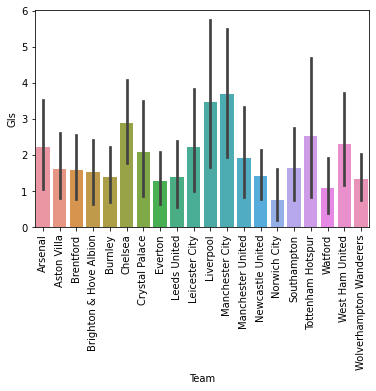

In [ ]:
import matplotlib.pyplot as plt
sns.barplot(x='Team', y = 'Gls', data = Football) 
plt.xticks(rotation=90)

#Bivariado

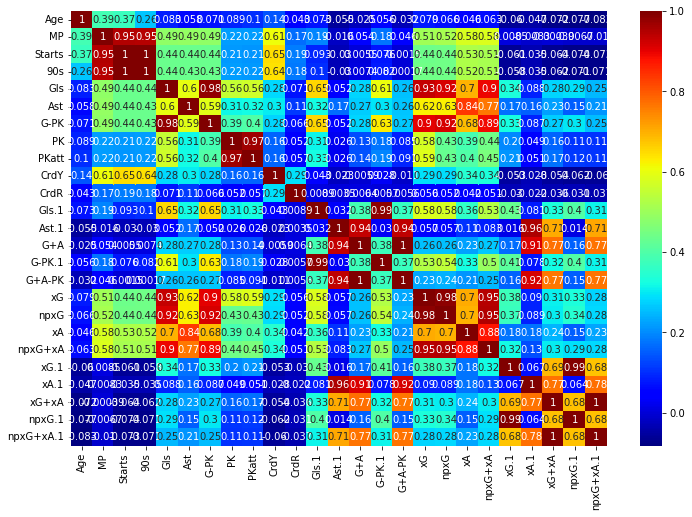

In [ ]:
#Correlaciones de Pearson
plt.figure(figsize=(12, 8))
corr = Football.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True,cmap='jet');

In [ ]:
from scipy.stats import pearsonr
import numpy as np
rho = Football.corr()
rho

,Age,MP,Starts,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,...,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1
Age,1.000000,0.386663,0.373969,0.263558,0.082539,0.057860,0.071040,0.089168,0.100326,0.143874,...,-0.031903,0.079008,0.065820,0.045644,0.063096,-0.059551,-0.046844,-0.072007,-0.076858,-0.082782
MP,0.386663,1.000000,0.951965,0.948554,0.485586,0.491970,0.488003,0.220193,0.221130,0.607290,...,0.045840,0.507399,0.516657,0.578464,0.584475,0.008502,-0.008270,-0.000391,-0.006665,-0.010219
Starts,0.373969,0.951965,1.000000,0.996840,0.437445,0.436721,0.436061,0.213840,0.212677,0.646453,...,-0.001487,0.441054,0.444560,0.525085,0.514335,-0.060919,-0.035456,-0.064214,-0.074061,-0.072619
90s,0.263558,0.948554,0.996840,1.000000,0.436486,0.434714,0.434083,0.217811,0.216578,0.642134,...,0.000171,0.441737,0.444396,0.523797,0.513695,-0.057923,-0.035186,-0.062088,-0.071466,-0.070756
Gls,0.082539,0.485586,0.437445,0.436486,1.000000,0.598646,0.981507,0.555423,0.564380,0.284646,...,0.256807,0.934594,0.915569,0.698561,0.898136,0.335561,0.088136,0.278773,0.293026,0.250684
Ast,0.057860,0.491970,0.436721,0.434714,0.598646,1.000000,0.591630,0.314887,0.319781,0.302167,...,0.260424,0.623973,0.625190,0.838437,0.766230,0.172548,0.157537,0.225152,0.151045,0.211610
G-PK,0.071040,0.488003,0.436061,0.434083,0.981507,0.591630,1.000000,0.385966,0.402898,0.278745,...,0.265250,0.903980,0.917811,0.684971,0.893922,0.326360,0.086523,0.271889,0.299805,0.253875
PK,0.089168,0.220193,0.213840,0.217811,0.555423,0.314887,0.385966,1.000000,0.969610,0.160865,...,0.085321,0.576898,0.425174,0.390843,0.444929,0.199354,0.048870,0.162320,0.109754,0.105222
PKatt,0.100326,0.221130,0.212677,0.216578,0.564380,0.319781,0.402898,0.969610,1.000000,0.160369,...,0.091130,0.589698,0.432692,0.401508,0.454637,0.212742,0.050819,0.172406,0.115949,0.110522
CrdY,0.143874,0.607290,0.646453,0.642134,0.284646,0.302167,0.278745,0.160865,0.160369,1.000000,...,-0.011343,0.290103,0.288848,0.344457,0.335646,-0.052615,-0.028134,-0.053629,-0.062157,-0.059602


In [ ]:
from pandas.core.groupby.groupby import F
from scipy.stats import pearsonr
import numpy as np
rho = Football.corr()
pval = Football.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape) # quitar de la diagonal los unos con np.eye
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01] if x<=t]))
rho.round(2).astype(str) + p

,Age,MP,Starts,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,...,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1
Age,1.0*,0.39*,0.37*,0.26*,0.08,0.06,0.07,0.09,0.1,0.14*,...,-0.03,0.08,0.07,0.05,0.06,-0.06,-0.05,-0.07,-0.08,-0.08
MP,0.39*,1.0*,0.95*,0.95*,0.49*,0.49*,0.49*,0.22*,0.22*,0.61*,...,0.05,0.51*,0.52*,0.58*,0.58*,0.01,-0.01,-0.0,-0.01,-0.01
Starts,0.37*,0.95*,1.0*,1.0*,0.44*,0.44*,0.44*,0.21*,0.21*,0.65*,...,-0.0,0.44*,0.44*,0.53*,0.51*,-0.06,-0.04,-0.06,-0.07,-0.07
90s,0.26*,0.95*,1.0*,1.0*,0.44*,0.43*,0.43*,0.22*,0.22*,0.64*,...,0.0,0.44*,0.44*,0.52*,0.51*,-0.06,-0.04,-0.06,-0.07,-0.07
Gls,0.08,0.49*,0.44*,0.44*,1.0*,0.6*,0.98*,0.56*,0.56*,0.28*,...,0.26*,0.93*,0.92*,0.7*,0.9*,0.34*,0.09,0.28*,0.29*,0.25*
Ast,0.06,0.49*,0.44*,0.43*,0.6*,1.0*,0.59*,0.31*,0.32*,0.3*,...,0.26*,0.62*,0.63*,0.84*,0.77*,0.17*,0.16*,0.23*,0.15*,0.21*
G-PK,0.07,0.49*,0.44*,0.43*,0.98*,0.59*,1.0*,0.39*,0.4*,0.28*,...,0.27*,0.9*,0.92*,0.68*,0.89*,0.33*,0.09,0.27*,0.3*,0.25*
PK,0.09,0.22*,0.21*,0.22*,0.56*,0.31*,0.39*,1.0*,0.97*,0.16*,...,0.09,0.58*,0.43*,0.39*,0.44*,0.2*,0.05,0.16*,0.11,0.11
PKatt,0.1,0.22*,0.21*,0.22*,0.56*,0.32*,0.4*,0.97*,1.0*,0.16*,...,0.09,0.59*,0.43*,0.4*,0.45*,0.21*,0.05,0.17*,0.12*,0.11*
CrdY,0.14*,0.61*,0.65*,0.64*,0.28*,0.3*,0.28*,0.16*,0.16*,1.0*,...,-0.01,0.29*,0.29*,0.34*,0.34*,-0.05,-0.03,-0.05,-0.06,-0.06


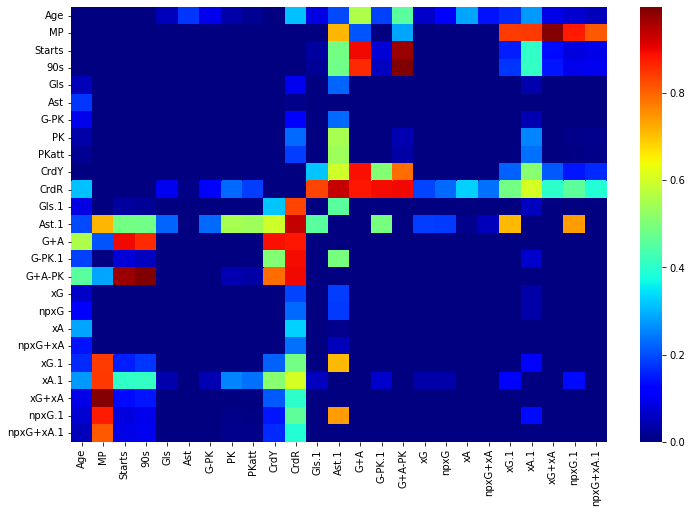

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(pval,cmap='jet')

#Relaciones númericas

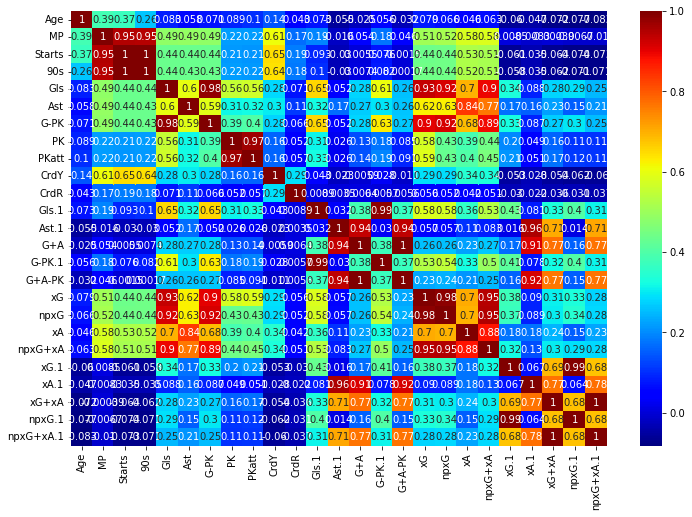

In [ ]:
plt.figure(figsize=(12, 8))
corr = Football.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True,cmap='jet');

Se verifica fuera de las relaciones mas logicas (por ejemplo partidos jugados y goles o goles con asistencias) los siguientes puntos: 
- Alta correlacion entre goles y tarjetas rojas
- Alta correlacion entre asistencias y tarjetas rojas 
- Alta correlacion entre goles mas asistencias y las tarjetas amarillas 
- Mediana correlacion entre los goles mas asistencias y la edad del jugador  

#Missingness

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribucion Asistencias de visitante')

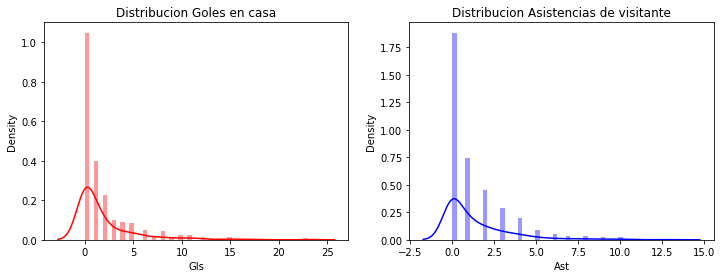

In [ ]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(Football['Gls'],bins=50,color='r',ax=ax)
ax.set_title('Distribucion Goles')

ax=f.add_subplot(122)
sns.distplot(Football['Ast'],bins=50,color='b',ax=ax)
ax.set_title('Distribucion Asistencias')

#Feature Engineering

In [ ]:
# Dummy
cat = ['Gls']
df_encode = pd.get_dummies(data = Football_prueba, prefix = 'OHE', prefix_sep='_',
               columns = cat,
               drop_first =True,
              dtype='int8')
df_encode

,Player,Team,Nation,Pos,Age,MP,Starts,Min,90s,Ast,...,OHE_10.0,OHE_11.0,OHE_12.0,OHE_13.0,OHE_14.0,OHE_15.0,OHE_16.0,OHE_17.0,OHE_18.0,OHE_23.0
0,Bukayo Saka,Arsenal,eng ENG,"FW,MF",19.0,38,36,"2,978",33.1,7.0,...,0,1,0,0,0,0,0,0,0,0
1,Gabriel Dos Santos,Arsenal,br BRA,DF,23.0,35,35,"3,063",34.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,Aaron Ramsdale,Arsenal,eng ENG,GK,23.0,34,34,"3,060",34.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,Ben White,Arsenal,eng ENG,DF,23.0,32,32,"2,880",32.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,Martin Ødegaard,Arsenal,no NOR,MF,22.0,36,32,"2,785",30.9,4.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,Luke Cundle,Wolverhampton Wanderers,eng ENG,MF,19.0,4,2,180,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
679,Chiquinho,Wolverhampton Wanderers,pt POR,"DF,MF",21.0,8,1,208,2.3,3.0,...,0,0,0,0,0,0,0,0,0,0
680,John Ruddy,Wolverhampton Wanderers,eng ENG,GK,34.0,2,1,135,1.5,0.0,...,0,0,0,0,0,0,0,0,0,0
681,Chem Campbell,Wolverhampton Wanderers,wls WAL,MF,18.0,1,0,13,0.1,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_encodef = df_encode.drop(['Player', 'Team', 'Nation','Pos','Min'], axis=1)
df_encodef

,Age,MP,Starts,90s,Ast,G-PK,PK,PKatt,CrdY,CrdR,...,OHE_10.0,OHE_11.0,OHE_12.0,OHE_13.0,OHE_14.0,OHE_15.0,OHE_16.0,OHE_17.0,OHE_18.0,OHE_23.0
0,19.0,38,36,33.1,7.0,9.0,2.0,2.0,6.0,0.0,...,0,1,0,0,0,0,0,0,0,0
1,23.0,35,35,34.0,0.0,5.0,0.0,0.0,8.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,23.0,34,34,34.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,23.0,32,32,32.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,22.0,36,32,30.9,4.0,7.0,0.0,0.0,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,19.0,4,2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
679,21.0,8,1,2.3,3.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
680,34.0,2,1,1.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
681,18.0,1,0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_encodef.isnull().any(axis=1).sum()

0

In [ ]:
df_encodef.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 0 to 682
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        546 non-null    float64
 1   MP         546 non-null    int64  
 2   Starts     546 non-null    int64  
 3   90s        546 non-null    float64
 4   Ast        546 non-null    float64
 5   G-PK       546 non-null    float64
 6   PK         546 non-null    float64
 7   PKatt      546 non-null    float64
 8   CrdY       546 non-null    float64
 9   CrdR       546 non-null    float64
 10  Gls.1      546 non-null    float64
 11  Ast.1      546 non-null    float64
 12  G+A        546 non-null    float64
 13  G-PK.1     546 non-null    float64
 14  G+A-PK     546 non-null    float64
 15  xG         546 non-null    float64
 16  npxG       546 non-null    float64
 17  xA         546 non-null    float64
 18  npxG+xA    546 non-null    float64
 19  xG.1       546 non-null    float64
 20  xA.1      

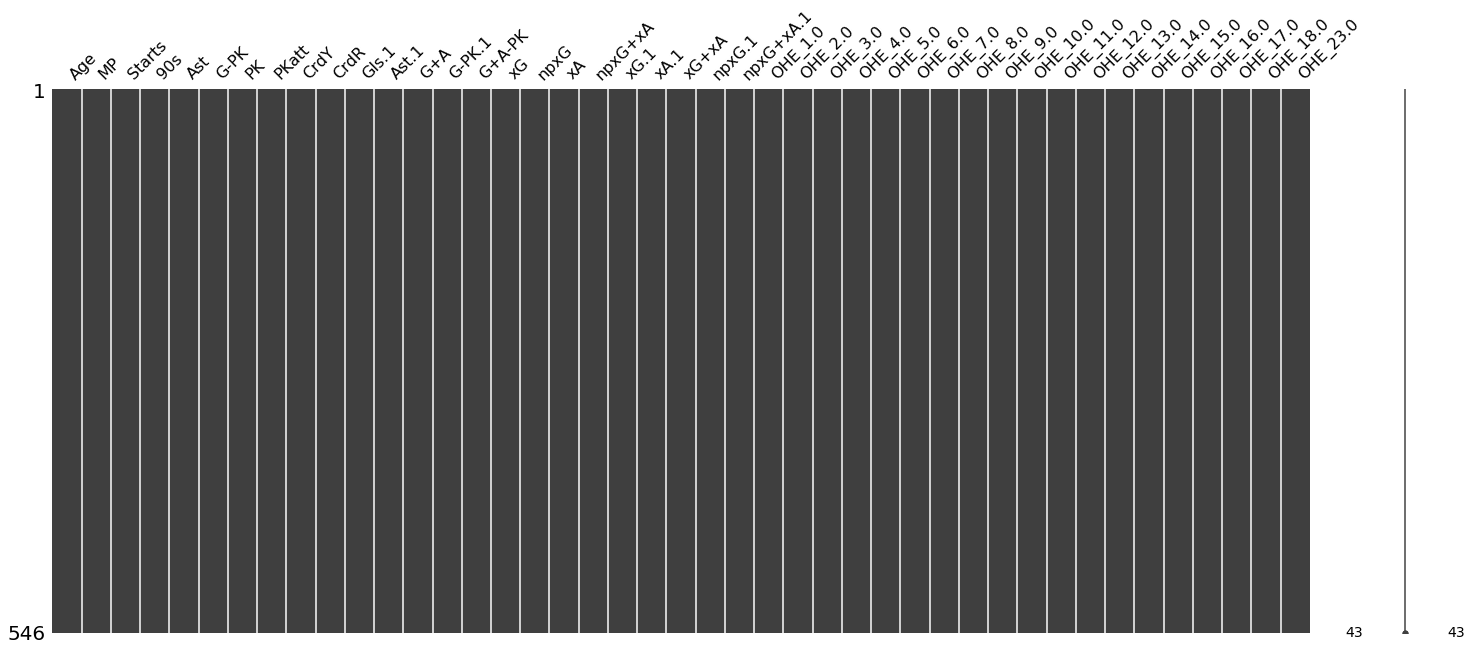

In [ ]:
import missingno as msno
msno.matrix(df_encodef)

#Metodologia tradicional

#Stratified- K fold (regresion)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
# crear el modelo
model = RandomForestRegressor(random_state=42, n_estimators=10,max_depth=4)

In [ ]:
scores = cross_val_score(model, X, y, cv=5, verbose=1,scoring='r2')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


In [ ]:
scores

array([0.8745429 , 0.93506651, 0.83876292, 0.91179065, 0.90721189])

In [ ]:
print("%0.2f de r2 promedio con una desviacion estandar de %0.2f" % (scores.mean(), scores.std()))

0.89 de r2 promedio con una desviacion estandar de 0.03


In [ ]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV

In [ ]:
y= df_encodef['Ast']
X= df_encodef.drop(columns='Ast', axis=1)
print(X.shape, y.shape)

(546, 42) (546,)


In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)

(382, 42) (164, 42)


In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier().fit(X_train, y_train)
# predicciones
xgb_y_predict = xgb_model.predict(X_test)

In [ ]:
# Accuracy sencillo
xgb_score = accuracy_score(xgb_y_predict, y_test)
print('Accuracy score is:', xgb_score)

Accuracy score is: 0.8719512195121951


In [ ]:
from sklearn.metrics import classification_report 
print(classification_report(xgb_y_predict,y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        77
         1.0       1.00      0.92      0.96        39
         2.0       0.90      0.82      0.86        22
         3.0       0.46      0.46      0.46        13
         4.0       0.56      0.62      0.59         8
         5.0       0.50      0.50      0.50         2
         6.0       0.00      0.00      0.00         1
         7.0       0.00      0.00      0.00         1
         8.0       0.00      0.00      0.00         1
         9.0       0.00      0.00      0.00         0

    accuracy                           0.87       164
   macro avg       0.44      0.43      0.44       164
weighted avg       0.90      0.87      0.88       164



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Random under-sampling

In [ ]:
# Conteo de clases
goles_count_0, goles_count_1 = df_encodef['OHE_10.0'].value_counts()
# Separar clases
goles_0 = df_encodef[df_encodef['OHE_10.0'] == 0]
goles_1 = df_encodef[df_encodef['OHE_10.0'] == 1]
print('class 0:', goles_0.shape)
print('class 1:', goles_1.shape)

class 0: (540, 43)
class 1: (6, 43)


Total para goles 1 y 0: 0    6
1    6
Name: OHE_10.0, dtype: int64


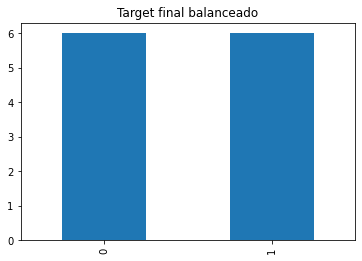

In [ ]:
# Remover observaciones de la clase mayoritaria aleatoriamente
goles_0_under = goles_0.sample(goles_count_1)
test_under = pd.concat([goles_0_under, goles_1], axis=0)
print("Total para goles 1 y 0:",test_under['OHE_10.0'].value_counts()) 
test_under['OHE_10.0'].value_counts().plot(kind='bar', title='Target final balanceado')

In [ ]:
# Separar en X y y
y= test_under['OHE_10.0']
X= test_under.drop(columns='OHE_10.0', axis=1)
print(X.shape, y.shape)
# Separar en train y test
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)

(12, 42) (12,)
(8, 42) (4, 42)


##Seleccion manual

In [ ]:
model= xgb.XGBClassifier(learning_rate=0.001)
# Lista de hiperparametros
params_1 = {'criterion': 'gini', 'splitter': 'best', 'max_depth': 5}
params_2 = {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 7}
params_3 = {'criterion': 'gini', 'splitter': 'random', 'max_depth': 10}

In [ ]:
params_grid = {
        #'min_child_weight': [1, 5],
        #'gamma': [0.5, 1],
        #'subsample': [0.6, 0.8],
        #'colsample_bytree': [0.6, 0.8],
        'max_depth': [5,6],
        'criterion':['entropy','gini']
        }

In [ ]:
S
model.set_params(**params_1).fit(X_train, y_train)
print(f'Accuracy para Modelo 1 = {round(accuracy_score(y_test, model.predict(X_test)), 5)}')
# Modelo 2
model.set_params(**params_2).fit(X_train, y_train)
print(f'Accuracy para Modelo 2 = {round(accuracy_score(y_test, model.predict(X_test)), 5)}')
# Modelo 3
model.set_params(**params_3).fit(X_train, y_train)
print(f'Accuracy para Modelo 3 = {round(accuracy_score(y_test, model.predict(X_test)), 5)}')

Accuracy para Modelo 1 = 0.25
Accuracy para Modelo 2 = 0.25
Accuracy para Modelo 3 = 0.25


##Grid Search

In [ ]:
params_grid = {
        #'min_child_weight': [1, 5],
        #'gamma': [0.5, 1],
        #'subsample': [0.6, 0.8],
        #'colsample_bytree': [0.6, 0.8],
        'max_depth': [5,6],
        'criterion':['entropy','gini']
        }

In [ ]:
# tiempo de ejecucuon (20 seg)
grid_cv = GridSearchCV(model, params_grid, scoring="accuracy", n_jobs=-1, cv=3)
grid_cv.fit(X_train, y_train)
print("Mejores Parametros", grid_cv.best_params_)
print("Mejor CV score", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 5)}')

Mejores Parametros {'criterion': 'entropy', 'max_depth': 5}
Mejor CV score 0.611111111111111
Accuracy del modelo = 0.25


##Randomized Search CV

In [ ]:
# tiempo de ejecucuon 7 seg
grid_cv = RandomizedSearchCV(model, params_grid, scoring="accuracy", n_jobs=-1, cv=3)
grid_cv.fit(X_train, y_train)

print("Mejores parametros", grid_cv.best_params_)
print("Mejor score de CV", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 5)}')

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejores parametros {'max_depth': 5, 'criterion': 'entropy'}
Mejor score de CV 0.611111111111111
Accuracy del modelo = 0.25


# Random over-sampling

total de goles 1 y 0: 1    540
0    540
Name: OHE_10.0, dtype: int64


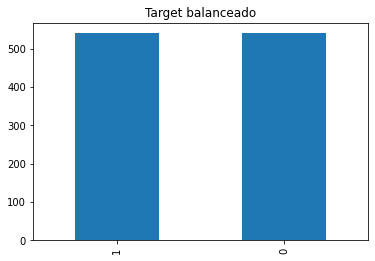

In [ ]:
S_counts())
test_over['OHE_10.0'].value_counts().plot(kind='bar', title='Target balanceado')

In [ ]:
# Separar en X y y
y= test_over['OHE_10.0']
X= test_over.drop(columns='OHE_10.0', axis=1)
print(X.shape, y.shape)
# Separar en train y test
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)

(1080, 42) (1080,)
(756, 42) (324, 42)


##Seleccion manual

In [ ]:
model= xgb.XGBClassifier(learning_rate=0.001)
# Lista de hiperparametros
params_1 = {'criterion': 'gini', 'splitter': 'best', 'max_depth': 5}
params_2 = {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 7}
params_3 = {'criterion': 'gini', 'splitter': 'random', 'max_depth': 10}

In [ ]:
S
model.set_params(**params_2).fit(X_train, y_train)
print(f'Accuracy para Modelo 2 = {round(accuracy_score(y_test, model.predict(X_test)), 5)}')
# Modelo 3
model.set_params(**params_3).fit(X_train, y_train)
print(f'Accuracy para Modelo 3 = {round(accuracy_score(y_test, model.predict(X_test)), 5)}')

Accuracy para Modelo 1 = 0.98457
Accuracy para Modelo 2 = 0.98457
Accuracy para Modelo 3 = 0.98457


##Randomized Search CV

In [ ]:
# tiempo de ejecucuon 16 seg
grid_cv = RandomizedSearchCV(model, params_grid, scoring="accuracy", n_jobs=-1, cv=3)
grid_cv.fit(X_train, y_train)

print("Mejores parametros", grid_cv.best_params_)
print("Mejor score de CV", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 5)}')

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejores parametros {'max_depth': 5, 'criterion': 'entropy'}
Mejor score de CV 0.9801587301587302
Accuracy del modelo = 0.98457


##Halving Randomized Search

In [ ]:
# tiempo de ejecucuon 11 seg
halving_cv = HalvingRandomSearchCV(model, params_grid, scoring="accuracy", factor=3)
halving_cv.fit(X_train, y_train)

print("Mejores parametros", halving_cv.best_params_)
print("Mejor CV score", halving_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, halving_cv.predict(X_test)), 5)}')

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 4 is smaller than n_iter=37. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejores parametros {'max_depth': 5, 'criterion': 'gini'}
Mejor CV score 0.9484848484848485
Accuracy del modelo = 0.98457


#Modelo

In [ ]:
X = df_encodef.drop('Ast',axis=1) # Independet variable
y = df_encodef['Ast'] # dependent variable
import statsmodels.api as sm
x = sm.add_constant(X)
model = sm.OLS(y, x).fit()
pred = model.predict(x)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    Ast   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     50.51
Date:                Wed, 18 Jan 2023   Prob (F-statistic):          1.24e-151
Time:                        00:57:47   Log-Likelihood:                -717.82
No. Observations:                 546   AIC:                             1520.
Df Residuals:                     504   BIC:                             1700.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4309      0.253     -1.704      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-1.3631424031873827e-13


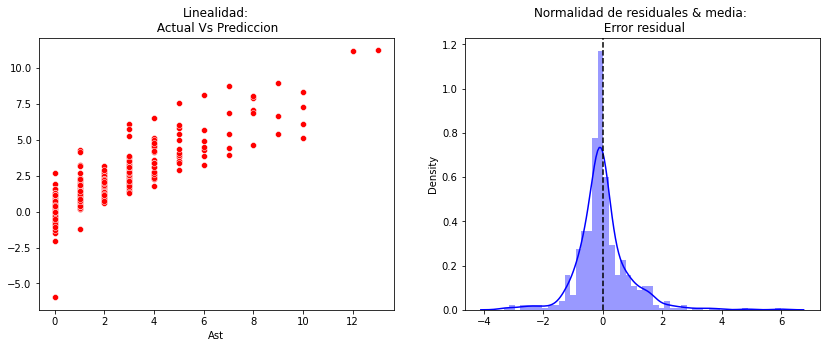

In [ ]:
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y,pred,ax=ax,color='r')
ax.set_title('Linealidad:\n Actual Vs Prediccion')

ax = f.add_subplot(122)
sns.distplot((y - pred),ax=ax,color='b')
ax.axvline((y - pred).mean(),color='k',linestyle='--')
print((y - pred).mean())
ax.set_title('Normalidad de residuales & media: \n Error residual');

In [ ]:
model.rsquared

0.8042641273673885

In [ ]:
# Multicolinealidad
#Variance Inflation Factor
VIF = 1/(1- model.rsquared)
VIF

5.1089255461974545

#Evaluación del modelo

In [ ]:
X = df_encodef.drop('Ast',axis=1) # Independet variable
y = df_encodef['Ast'] # dependent variable

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y,test_size = 0.3, random_state = 123)

In [ ]:
#!pip install xgboost
import xgboost as xg

In [ ]:
# Modelo base
xgb_r = xg.XGBRegressor(objective ='reg:squarederror',n_estimators = 100, seed = 42, max_depth=10, eta=0.01, 
                        subsample=0.7, colsample_bytree=0.8)
# Ajustar rl modelo
xgb_r.fit(train_X, train_y)

XGBRegressor(colsample_bytree=0.8, eta=0.01, max_depth=10,
             objective='reg:squarederror', seed=42, subsample=0.7)

In [ ]:
y_pred=xgb_r.predict(test_X)

In [ ]:
y_pred

array([ 2.17712021e+00,  2.69410610e+00,  6.89538145e+00,  1.51613593e+00,
        4.67981005e+00,  3.52674103e+00,  1.85716987e+00, -3.79741192e-04,
        9.23871994e-07,  1.27587628e+00,  1.11015296e+00,  6.03613257e-03,
        4.54241562e+00,  1.91764259e+00,  8.13637161e+00,  6.10957444e-02,
        1.01667213e+00,  6.39587641e-04,  1.44683409e+00,  1.42154419e+00,
        1.09990382e+00,  1.31358051e+00,  2.11955380e+00,  1.20193815e+00,
        1.00381875e+00,  2.35551953e+00,  8.30361247e-03,  9.23871994e-07,
       -2.05039978e-05, -3.47352028e-03,  4.87554073e-03, -7.66503811e-03,
        3.21234494e-01,  1.33286238e+00,  3.17091417e+00,  1.64683437e+00,
        1.00677013e+00,  1.19309020e+00,  4.03450680e+00,  3.65566039e+00,
       -4.70578671e-04,  6.23474693e+00,  1.71473026e-01,  9.23871994e-07,
       -6.61611557e-05,  5.75776768e+00,  1.03827119e+00, -7.95626640e-02,
        1.93973184e-02,  3.05560803e+00,  4.09245491e-04,  1.69849169e+00,
        6.11920214e+00,  

In [ ]:
test_y

528    2.0
334    3.0
49     6.0
62     1.0
200    3.0
      ... 
262    0.0
0      7.0
191    2.0
261    1.0
422    1.0
Name: Ast, Length: 164, dtype: float64

#Validación simple

In [ ]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import max_error
print('R2 es:', r2_score(y_true=test_y, y_pred=y_pred))
print('MSE es:', mean_squared_error(y_true=test_y, y_pred=y_pred))
print('RMSE es:', np.sqrt(mean_squared_error(y_true=test_y, y_pred=y_pred)))
print('MAE es:', mean_absolute_error(y_true=test_y, y_pred=y_pred))
print('MAPE es:', mean_absolute_percentage_error(y_true=test_y, y_pred=y_pred))
print('MedAE es:', median_absolute_error(y_true=test_y, y_pred=y_pred))
print('MaxError es:', max_error(y_true=test_y, y_pred=y_pred))

R2 es: 0.9712067641195694
MSE es: 0.1161364292553775
RMSE es: 0.3407879535068361
MAE es: 0.18795036360984896
MAPE es: 60661815280415.29
MedAE es: 0.06031729280948639
MaxError es: 1.6798100471496582


#Modelo

In [ ]:
# Exporat el modelo
import joblib
import pickle
filename = "XGboost.joblib"
joblib.dump(xgb_r, filename) # exportarlo

['XGboost.joblib']

In [ ]:
# Cargar el modelo
filename = "XGboost.joblib"
loaded_model = joblib.load(filename)
#result = loaded_model.score(X_test, y_test)

In [ ]:
loaded_model.predict(test_X)

array([ 2.17712021e+00,  2.69410610e+00,  6.89538145e+00,  1.51613593e+00,
        4.67981005e+00,  3.52674103e+00,  1.85716987e+00, -3.79741192e-04,
        9.23871994e-07,  1.27587628e+00,  1.11015296e+00,  6.03613257e-03,
        4.54241562e+00,  1.91764259e+00,  8.13637161e+00,  6.10957444e-02,
        1.01667213e+00,  6.39587641e-04,  1.44683409e+00,  1.42154419e+00,
        1.09990382e+00,  1.31358051e+00,  2.11955380e+00,  1.20193815e+00,
        1.00381875e+00,  2.35551953e+00,  8.30361247e-03,  9.23871994e-07,
       -2.05039978e-05, -3.47352028e-03,  4.87554073e-03, -7.66503811e-03,
        3.21234494e-01,  1.33286238e+00,  3.17091417e+00,  1.64683437e+00,
        1.00677013e+00,  1.19309020e+00,  4.03450680e+00,  3.65566039e+00,
       -4.70578671e-04,  6.23474693e+00,  1.71473026e-01,  9.23871994e-07,
       -6.61611557e-05,  5.75776768e+00,  1.03827119e+00, -7.95626640e-02,
        1.93973184e-02,  3.05560803e+00,  4.09245491e-04,  1.69849169e+00,
        6.11920214e+00,  

#validación cruzada

##LOOCV

In [ ]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
cv = LeaveOneOut()

In [ ]:
model = RandomForestClassifier(random_state=42,n_estimators=30, criterion="gini",max_depth=4)

In [ ]:
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 546 out of 546 | elapsed:   31.2s finished


In [ ]:
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.731 (0.444)


El modelo se evalúa utilizando LOOCV y el rendimiento estimado al hacer predicciones sobre nuevos datos tiene una precisión de alrededor de ~73%.